# OOD Prediction of Mean and Covariance Matrix using Bicycle

1. Install the patched version of Bicycle from https://github.com/kaiu85/bicycle.git

2. Train a model on a simple simulated dataset using https://github.com/kaiu85/bicycle/blob/main/notebooks/experiments/ood_prediction/train.py

3. Use [this notebook](https://github.com/kaiu85/bicycle/blob/main/notebooks/experiments/ood_prediction/bicycle_OOD_prediction_demo.ipynb) to explore the simulated data and the fitted model, and to predict the mean and covariance matrix of unseen perturbations.

# Check convergence

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os

# Path to the subdirectory in "plots" corresponding to the trained model, you
# want to use
base_path = "/content/drive/MyDrive/plots/20240914_1130_LOGO27_LATENT_SYNTHETIC_optimadam_b1_0.5_b2_0.9_pretrain_epochs0synthetic_T1.0_GRAD-CLIP_SIM:dCas9INF:dCas9-slow_lr_pairs_random-uniform_False_10000_False_2_1_0.0003_10_1.0_1.0_1.0_0.0_1.0_250"

In [2]:
def plot_vars_from_df(df, variables, xlim = [], ylim = [], title = ''):
    plt.figure()

    for variable in variables:
        df_plot = df[df["variable"] == variable]
        plt.plot( df_plot["epoch"], df_plot["value"], label = variable)

    if len(xlim) == 2:
        plt.xlim(xlim)
    if len(ylim) == 2:
        plt.ylim(ylim)
    if len(title) > 0:
        plt.title(title)

    plt.legend()
    plt.show()

In [3]:
log_path = os.path.join(base_path, "last_log_train.csv")
df = pd.read_csv(os.path.join(base_path,log_path))
df.variable.unique()

array(['train_kl_train', 'train_nll_train', 'train_sigma_min',
       'train_alpha_min', 'train_alpha_max', 'train_kl_valid',
       'train_nll_valid', 'train_kl_test', 'train_nll_test', 'train_loss',
       'train_l1', 'train_T', 'train_spectral_loss'], dtype=object)

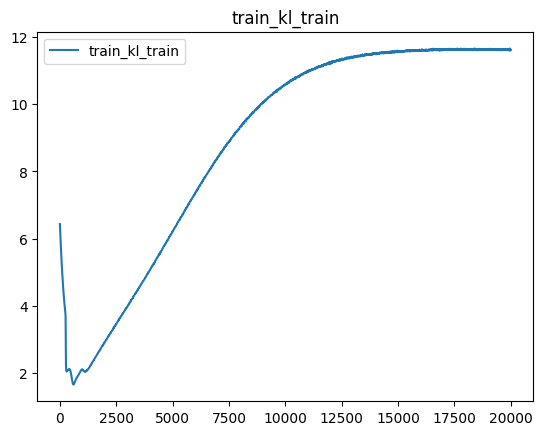

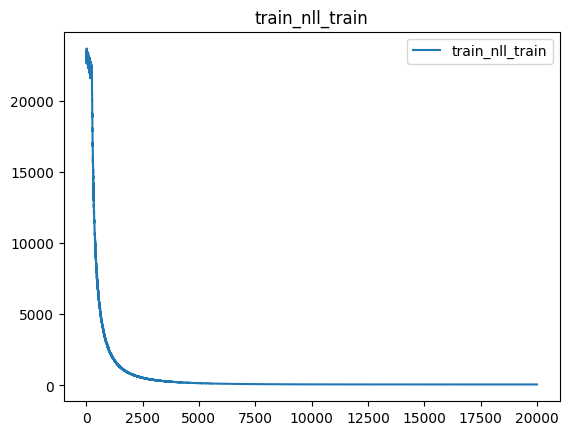

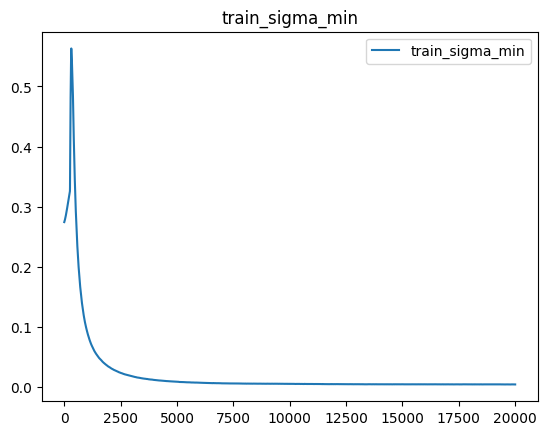

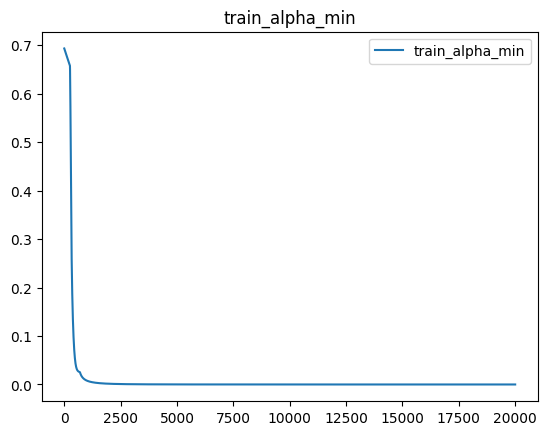

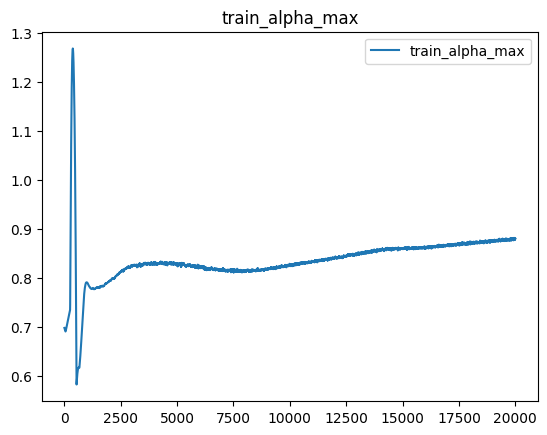

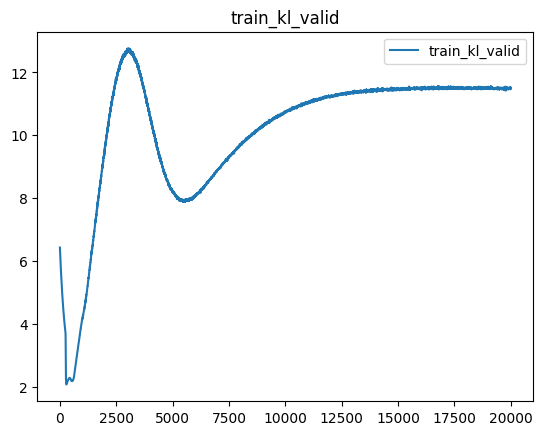

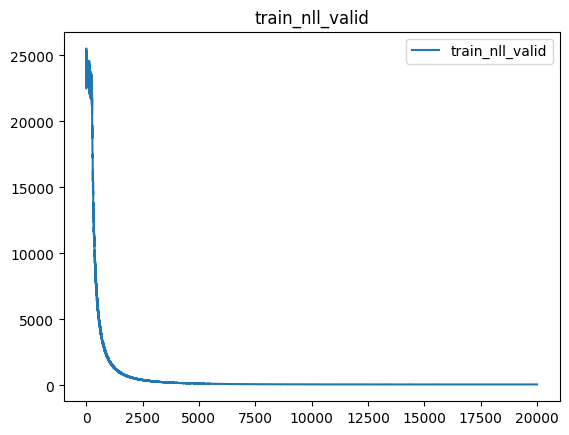

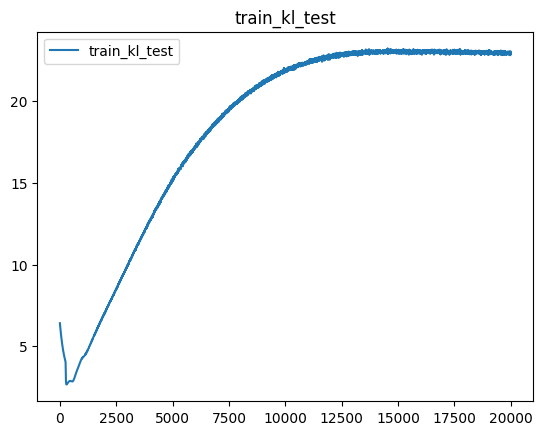

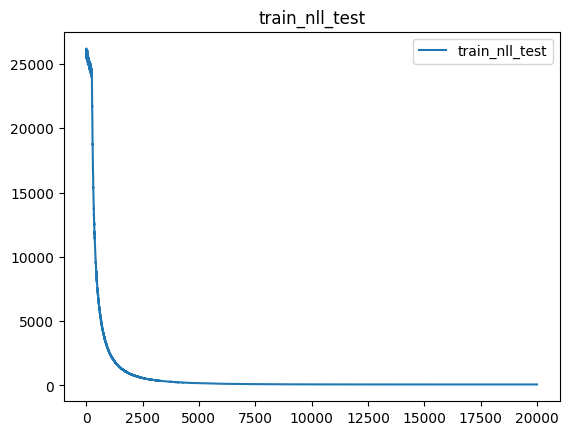

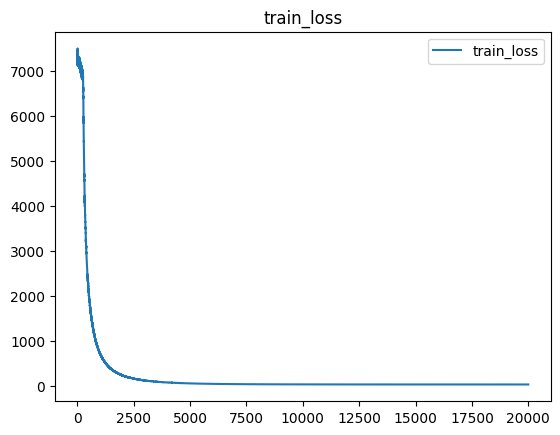

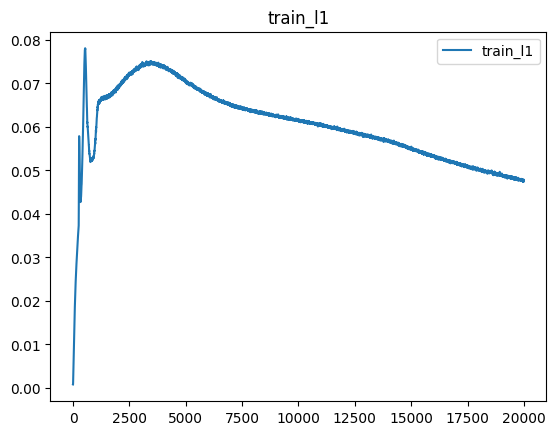

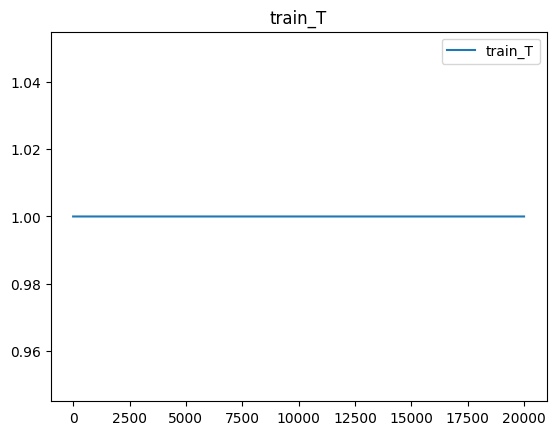

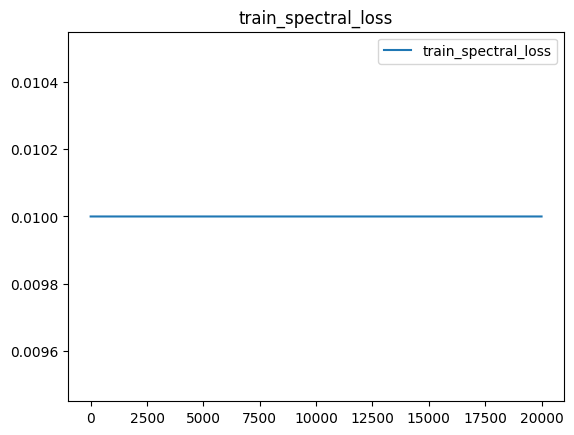

In [4]:
# Just have a look at the training curves

for var in df.variable.unique():
    plot_vars_from_df(df, [var], title = var)

# Check beta estimate

In [5]:
import numpy as np

true_path = os.path.join(base_path, "check_sim_beta.npy")
true_beta = np.load(os.path.join(base_path,true_path))

In [6]:
# The beta estimate, which you want to have a look at

estimated_path = os.path.join(base_path,"last_estimated_beta_epoch19500.npy")
estimated_beta = np.load(os.path.join(base_path,estimated_path))

Text(0.5, 23.52222222222222, 'Regulated / Downstream gene')

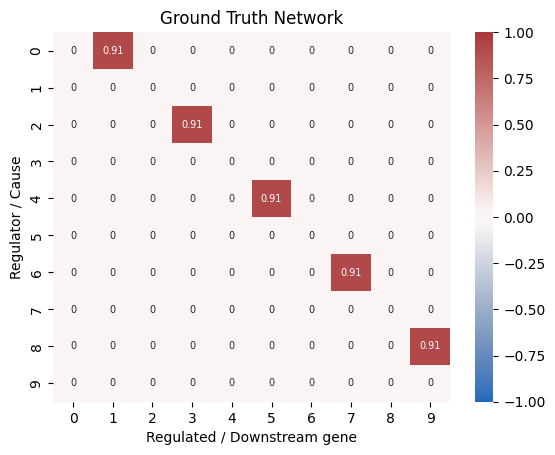

In [7]:
import seaborn as sns
plt.figure()
plt.title("Ground Truth Network")
sns.heatmap(true_beta,
            annot = True,
            annot_kws={"fontsize": 7},
            center=0,
            cmap="vlag",
            vmin = -1.0,
            vmax = 1.0)
plt.ylabel('Regulator / Cause')
plt.xlabel('Regulated / Downstream gene')

Text(0.5, 23.52222222222222, 'Regulated / Downstream gene')

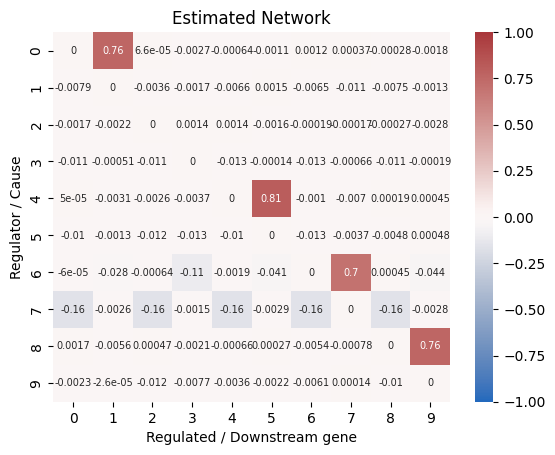

In [8]:
plt.figure()
plt.title("Estimated Network")
sns.heatmap(estimated_beta[:10,:10],
            annot = True,
            annot_kws={"fontsize": 7},
            center=0,
            cmap="vlag",
            vmin = -1.0,
            vmax = 1.0)
plt.ylabel('Regulator / Cause')
plt.xlabel('Regulated / Downstream gene')

# Load and explore simulated data

In [9]:
import numpy as np
import matplotlib.pyplot as plt

samples = np.load(os.path.join(base_path,"check_sim_samples.npy"))
regimes = np.load(os.path.join(base_path,"check_sim_regimes.npy"))
gt_interv = np.load(os.path.join(base_path,"check_sim_gt_interv.npy"))
beta = np.load(os.path.join(base_path,"check_sim_beta.npy"))

Text(0.5, 23.52222222222222, 'Regulated / Downstream gene')

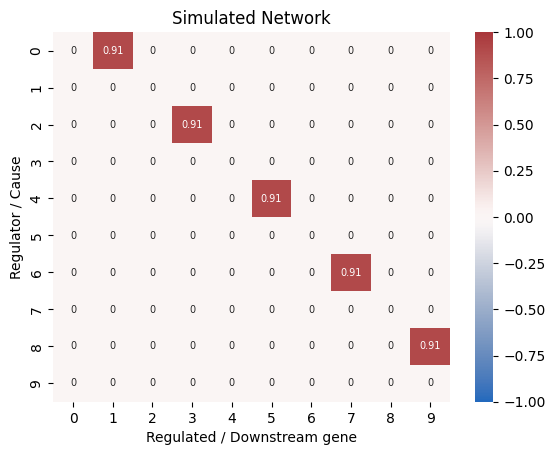

In [10]:
import seaborn as sns
plt.figure()
plt.title("Simulated Network")
sns.heatmap(beta,
            annot = True,
            annot_kws={"fontsize": 7},
            center=0,
            cmap="vlag",
            vmin = -1.0,
            vmax = 1.0)
plt.ylabel('Regulator / Cause')
plt.xlabel('Regulated / Downstream gene')

Text(50.722222222222214, 0.5, 'Genes targeted')

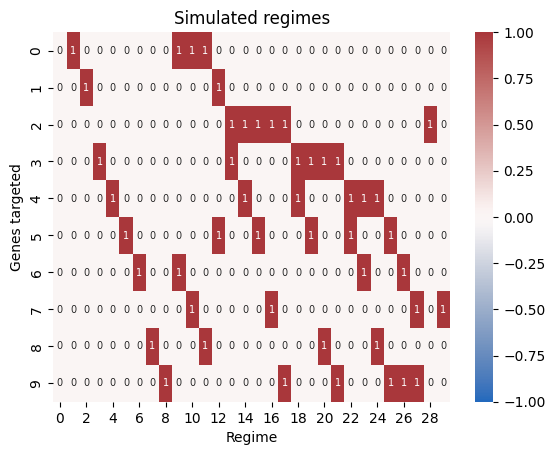

In [11]:
sns.heatmap(gt_interv,
            annot = True,
            annot_kws={"fontsize": 7},
            center=0,
            cmap="vlag",
            vmin = -1.0,
            vmax = 1.0)

plt.title('Simulated regimes')
plt.xlabel('Regime')
plt.ylabel('Genes targeted')

# Convert counts to normalized / relative counts (sum of 1 per cell)

In [12]:
relative_counts = samples / (samples.sum(axis = 1, keepdims = True))


# Explore correlation structure of relative counts between genes for different regimes

Correlation of relative counts between genes 0 and 1 in regime 28:
0.26342798544809504
Correlation of relative counts between genes 2 and 3 in regime 28:
0.4058629166370834
Correlation of relative counts between genes 4 and 5 in regime 28:
0.19561713666630998
Correlation of relative counts between genes 6 and 7 in regime 28:
0.2740749793593701
Correlation of relative counts between genes 8 and 9 in regime 28:
0.2955136535936039


<Figure size 640x480 with 0 Axes>

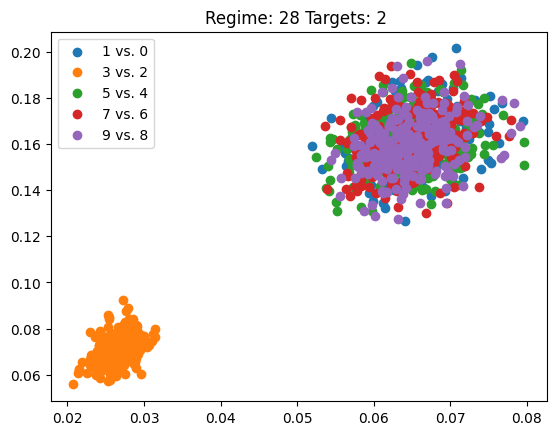

Correlation of relative counts between genes 0 and 1 in regime 3:
0.23013467413147926
Correlation of relative counts between genes 2 and 3 in regime 3:
0.09856629947893332
Correlation of relative counts between genes 4 and 5 in regime 3:
0.19501818531480908
Correlation of relative counts between genes 6 and 7 in regime 3:
0.20483121266073134
Correlation of relative counts between genes 8 and 9 in regime 3:
0.18533374335424005


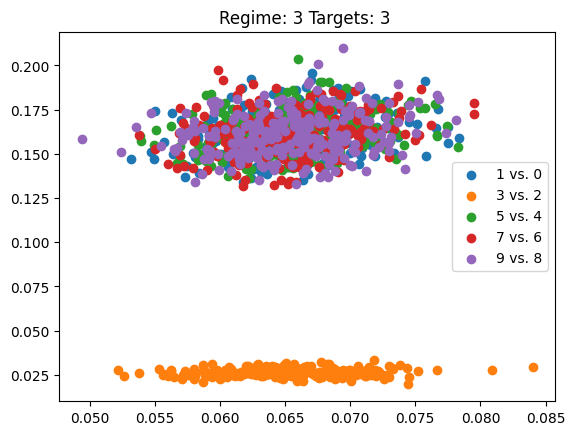

In [13]:
plt.figure()

plot_regimes = [28, 3]

for plot_regime in plot_regimes:

  plt.figure()

  for i in range(0,10,2):

    x = relative_counts[regimes == plot_regime,i]
    y = relative_counts[regimes == plot_regime,i+1]

    print('Correlation of relative counts between genes %d and %d in regime %d:' % (i,i+1,plot_regime))

    plt.scatter(x,y, label = '%d vs. %d' % (i+1,i))

    print(np.corrcoef(x,y)[0,1])

  plt.legend()

  title = 'Regime: %d' % plot_regime

  targets = np.where(gt_interv[:,plot_regime])[0].tolist()

  if len(targets) > 0:
    title = title + ' Targets: '
    for target in targets:
      title = title + '%d ' % target


  plt.title(title)
  plt.show()

# Load fitted model and perform OOD prediction

In [15]:
from bicycle.model import BICYCLE
import torch

device = torch.device("cpu")

# Filename of the model checkpoint, which you want to be using.
# The early stopper usually saves the best model in the corresponding
# subdirectory of "models" with a filename of the form epoch=XXXX.ckpt
filename = "/content/drive/MyDrive/models/20240914_1130_LOGO27_LATENT_SYNTHETIC_optimadam_b1_0.5_b2_0.9_pretrain_epochs0synthetic_T1.0_GRAD-CLIP_SIM:dCas9INF:dCas9-slow_lr_pairs_random-uniform_False_10000_False_2_1_0.0003_10_1.0_1.0_1.0_0.0_1.0_250/epoch=18630.ckpt"

eval_model = BICYCLE.load_from_checkpoint(checkpoint_path=filename, map_location=device, strict=True)

# We will predict the mean and covariance matrix of the DENOISED (LATENT!) counts for the test regimes 28 and 29,
# which corresponds to the regimes in which a single gene was pertured (2 and 7, namely), which has not been
# perturbed in the training data.

# For this, we need to specify the corresponding marginal distribution of the
# denoised/latent expression states of the perturbed genes,
# as they are in principle not known (we want to predict what happens, when we *set* the marginal
# distributions of the perturbed genes to specific distributions).

# To be able to compare this to simulated data, we use the alpha and sigma parameters, which
# we actually used to simulate our data.

# We begin with the perturbation of gene 2, corresponding to simulated regime 28 in our data, c.f. plot of
# gt_interv above. See lines 142 and 147 (specification of alpha_p and sigma_p in the "linear-ou"
# case in bicycle/src/bicycle/utils/data.py).

# In general, the alpha and sigma parameters can directly be related to the mean
# and standard deviation of the single-gene marginal distribution via the
# steady-state distribution of a one-dimensional Ornstein-Uhlenbeck process
# via: mean = alpha, standard deviation = sigma / sqrt(2).
# (see, for example, https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process)
x_bar_predicted, omega_predicted = eval_model.predict_perturbation([2], [0.1], [0.1])

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type     | Params | Mode 
--------------------------------------------------
0 | pos          | Softplus | 0      | train
  | other params | n/a      | 110    | n/a  
--------------------------------------------------
110       Trainable params
0         Non-trainable params
110       Total params
0.000     Total estimated model params size (MB)
1         Modules in train mode
0         Modules in eval mode


setting device to: cpu


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1000` reached.


# Plot convergence of gradient-based Lyapunov solver

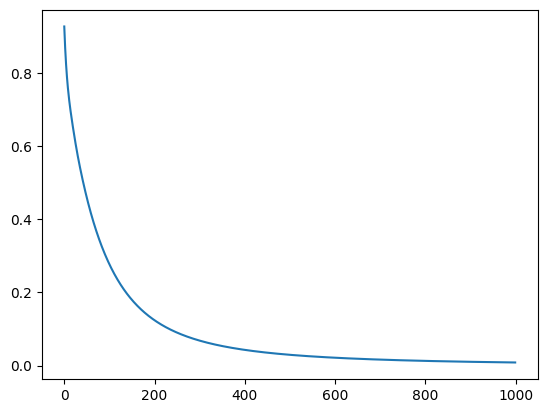

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(eval_model.omega_model.loss)

# Convert predicted x_bar into predicted relative counts

In [ ]:
s = torch.nn.Softmax(dim=0)
relative_counts_predicted = s(x_bar_predicted.squeeze())

# Calculate relative counts from simulated data of corresponding regime (28 for perturbation of gene 2)

In [ ]:
relative_counts_true = relative_counts[regimes == 28].mean(axis = 0)

print('PREDICTED RELATIVE COUNTS:')
print(relative_counts_predicted)

print('TRUE RELATIVE COUNTS:')
print(relative_counts_true)

print('DIFFERENCE:')
print(relative_counts_predicted.detach().cpu().numpy() - relative_counts_true)

PREDICTED RELATIVE COUNTS:
tensor([0.0571, 0.1412, 0.0668, 0.1410, 0.0570, 0.1413, 0.0570, 0.1404, 0.0571,
        0.1412], grad_fn=<SoftmaxBackward0>)
TRUE RELATIVE COUNTS:
[0.06509207 0.16057831 0.02654801 0.0711567  0.06479563 0.161016
 0.06499818 0.16147362 0.06479614 0.15954542]
DIFFERENCE:
[-0.00801505 -0.01941405  0.04027811  0.06984333 -0.0077825  -0.01969852
 -0.00803933 -0.0210577  -0.00773268 -0.01838171]


# Let us try again for regime 29, corresponding to a perturbation of gene 7.

In [ ]:
from bicycle.model import BICYCLE
import torch

# REMINDER: HERE WE DIRECTLY SPECIFY A LIST OF TARGET GENES AND THE PERTURBED
# ALPHA AND SIGMA PARAMETERS, WHICH CAN BE RELATED TO THE MARGINAL DISTRIBUTION
# OF THE DENOISED/LATENT EXPRESSION STATE OF THE PERTURBED GENES VIA THE
# STEADY-STATE DISTRIBUTION OF THE 1-DIMENSIONAL OU-PROCESS

# AGAIN WE TAKE THE GROUND-TRUTH VALUES
x_bar_predicted, omega_predicted = eval_model.predict_perturbation([7], [0.1], [0.1])

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type     | Params | Mode 
--------------------------------------------------
0 | pos          | Softplus | 0      | train
  | other params | n/a      | 110    | n/a  
--------------------------------------------------
110       Trainable params
0         Non-trainable params
110       Total params
0.000     Total estimated model params size (MB)
1         Modules in train mode
0         Modules in eval mode


setting device to: cpu


/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1000` reached.


# Plot convergence of gradient-based Lyapunov solver

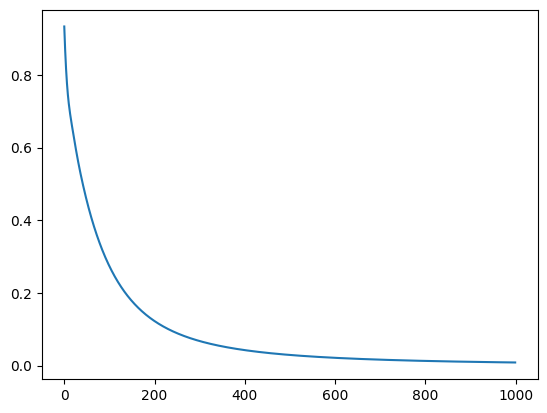

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(eval_model.omega_model.loss)

# Convert predicted x_bar into predicted relative counts

In [ ]:
s = torch.nn.Softmax(dim=0)
relative_counts_predicted = s(x_bar_predicted.squeeze())

# Calculate relative counts from simulated data of corresponding regime (29 for perturbation of gene 7)

In [ ]:
relative_counts_true = relative_counts[regimes == 29].mean(axis = 0)

print('PREDICTED RELATIVE COUNTS:')
print(relative_counts_predicted)

print('TRUE RELATIVE COUNTS:')
print(relative_counts_true)

print('DIFFERENCE:')
print(relative_counts_predicted.detach().cpu().numpy() - relative_counts_true)

PREDICTED RELATIVE COUNTS:
tensor([0.0650, 0.1555, 0.0648, 0.1394, 0.0652, 0.1571, 0.0650, 0.0672, 0.0652,
        0.1556], grad_fn=<SoftmaxBackward0>)
TRUE RELATIVE COUNTS:
[0.06501929 0.16220583 0.06481052 0.16015825 0.06527656 0.16267139
 0.06567213 0.02632732 0.06509478 0.16276394]
DIFFERENCE:
[-1.7583370e-05 -6.6889226e-03 -3.7290156e-05 -2.0744994e-02
 -3.4004450e-05 -5.5855364e-03 -6.4747036e-04  4.0846586e-02
  8.2701445e-05 -7.1734935e-03]


Note that the differences here are substantially smaller, in line with the correct identification of the causal relationship between genes 6 and 7, versus the missing edge between genes 2 and 3.

# Just to keep notebook running during training in console

In [ ]:
import time

while True:
  time.sleep(100.0)